# Final Project


## Description
*insert description final project*


## Objective
*insert objective final project*

## Dataset
*insert dataset information*

## Import Libraries

In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
from shapely.geometry import LineString
from shapely.ops import nearest_points
from collections import defaultdict
from shapely.geometry import Point

## Data Extraction

### Loading Traffic Dataset

In [2]:
%%time

traffic_data = gpd.read_file('dataset_shape/Traffic_TMSCOUNT_TDA.shp')

CPU times: total: 3min 6s
Wall time: 3min 7s


In [3]:
# print(traffic_data.shape)
# print()
# print(traffic_data.head())
# print()
# print(traffic_data.iloc[0])

### Filtering Traffic Dataset

In [4]:
traffic_data_filtered = traffic_data[['OBJECTID', 'ROADWAY', 'COSITE', 'MNGDIST', 'BEGDATE', 'DIR', 
                      'HR1', 'HR2', 'HR3', 'HR4', 'HR5', 'HR6', 'HR7', 'HR8', 'HR9', 
                      'HR10', 'HR11', 'HR12', 'HR13', 'HR14', 'HR15', 'HR16', 'HR17', 
                      'HR18', 'HR19', 'HR20', 'HR21', 'HR22', 'HR23', 'HR24', 
                      'TOTVOL', 'PEAKHR', 'PEAKVOL', 'geometry']]

In [5]:
# print(traffic_data_filtered.shape)
# print()
# print(traffic_data_filtered.head())
# print()
# print(traffic_data_filtered.iloc[0])

### Loading road network map

In [6]:
%%time

# road_data = gpd.read_file('basemap_arcs/Basemap_arcs.shp')
# road_data = gpd.read_file('basemap_route_road/basemap_route_road.shp')
road_data = gpd.read_file('basemap_routes/Basemap_routes.shp')

CPU times: total: 3.64 s
Wall time: 3.66 s


In [36]:
print(road_data.shape)
print()
print(road_data.head())
print()
print(road_data.iloc[0])

(19803, 14)

    ROAD_ID   ROADWAY  BEGIN_POST  END_POST   RTLENGTH RD_STATUS  HIGHMEASUR  \
0  89095026  89095026         0.0     0.365   0.367521        07       0.365   
1  89095024  89095024         0.0     0.356   0.351139        07       0.356   
2  75320810  75320810         0.0     1.358   1.358000        10       1.358   
3  77120000  77120000         0.0    11.282  11.285000        12      11.282   
4  77502001  77502001         0.0     0.806   0.825000        09       0.806   

   NUMSECTION COUNTY SECTION    OID2     SHAPE_LEN  \
0           2     89  095026      67    591.468473   
1           2     89  095024      68    565.103342   
2           3     75  320810   62085   2186.205990   
3          33     77  120000  198860  18161.155315   
4           4     77  502001   91605   1328.194885   

                                            geometry  \
0  LINESTRING (576123.125 2991567.000, 576109.438...   
1  LINESTRING (575837.812 2992103.500, 575856.188...   
2  LINESTRING

### Loading road connections

In [8]:
%%time

connections_data = gpd.read_file('aadt_historical/aadt_historical.shp')

CPU times: total: 27.7 s
Wall time: 27.7 s


In [65]:
print(connections_data.shape)
print()
print(connections_data.head())
print()
print(connections_data.iloc[0])

(100814, 23)

   YEAR_ DISTRICT  COSITE   ROADWAY              DESC_FRM  \
0   2019        3  461631  46600000   CR-2327/TRANSMITTER   
1   2019        6  878421  87000160              NW 20 ST   
2   2019        7  146016  14000076  SHADY HILLS ELEM ENT   
3   2019        1  135049  13040001              44 AVE E   
4   2019        2  720642  72291000             DIGNAN ST   

                DESC_TO   AADT AADTFLG KFLG K100FLG  ...      COUNTY MNG_DIST  \
0          US-231/SR-75   9400       C    F       F  ...         Bay        3   
1         RAMP 87270515   7100       F    F       F  ...  Miami-Dade        6   
2                   N/A  14000       E    F       F  ...       Pasco        7   
3    44 AVE CONN/SR 684  41500       C    F       F  ...     Manatee        1   
4  US-90/SR-10/W BEAVER  26000       C    F       F  ...       Duval        2   

  BEGIN_POST END_POST KFCTR  K100FCTR  DFCTR  TFCTR  Shape_Leng  \
0      2.598    4.308   9.0       0.0   53.8    9.9   2748.8317  

In [66]:
connections_data.columns

Index(['YEAR_', 'DISTRICT', 'COSITE', 'ROADWAY', 'DESC_FRM', 'DESC_TO', 'AADT',
       'AADTFLG', 'KFLG', 'K100FLG', 'DFLG', 'TFLG', 'COUNTYDOT', 'COUNTY',
       'MNG_DIST', 'BEGIN_POST', 'END_POST', 'KFCTR', 'K100FCTR', 'DFCTR',
       'TFCTR', 'Shape_Leng', 'geometry'],
      dtype='object')

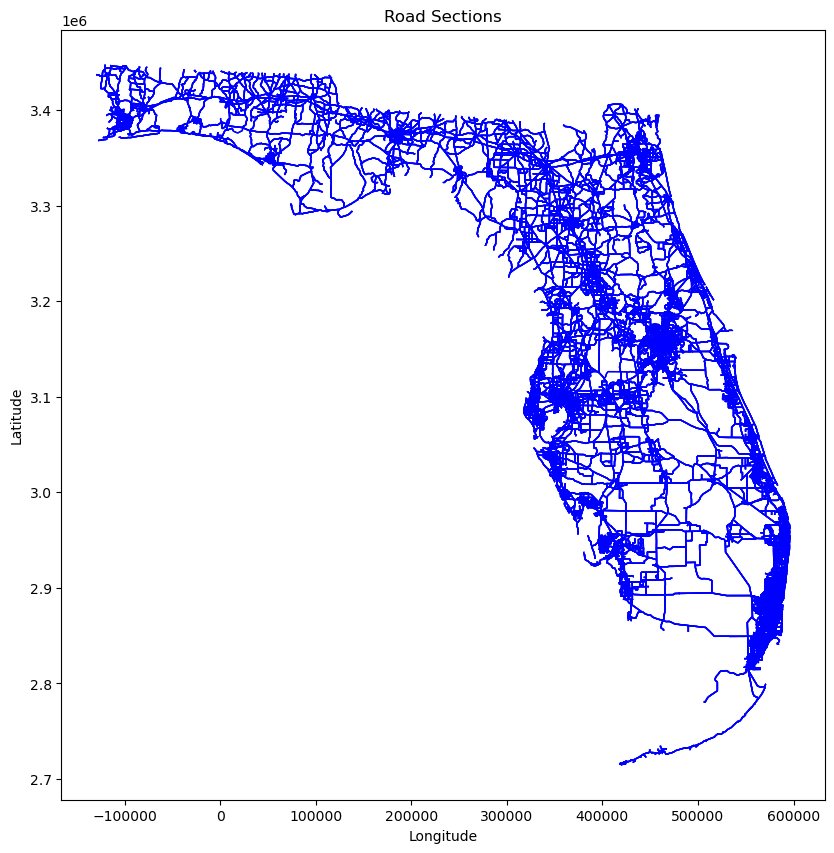

In [67]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the size as needed
connections_data.plot(ax=ax, linewidth=1, color='blue')  # You can change the color and line width

# Enhancing the plot
ax.set_title('Road Sections')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [10]:
print(len(connections_data['DESC_FRM'].unique()))
print(len(connections_data['DESC_TO'].unique()))

print()
print(len(connections_data['ROADWAY'].unique()))
print(len(road_data['ROADWAY'].unique()))
print(len(traffic_data_filtered['ROADWAY'].unique()))
print()

for x in connections_data['DESC_TO']:
    print(type(x))
    break

12651
12551

12046
19803
258

<class 'str'>


In [12]:
unique_cosite_traffic = set(traffic_data_filtered['COSITE'].unique())
unique_cosite_connections = set(connections_data['COSITE'].unique())

missing_cosites = unique_cosite_traffic.difference(unique_cosite_connections)

# if missing_cosites:
#     print("These COSITE entries from traffic_data_filtered are not present in connections_data:")
#     for cosite in missing_cosites:
#         #print(cosite)
# else:
#     print("All unique COSITE entries in traffic_data_filtered are present in connections_data.")

In [13]:
unique_roadways_in_traffic = set(traffic_data_filtered['COSITE'].unique())
unique_roadways_in_connections = set(connections_data['COSITE'].unique())

all_roadways_exist = unique_roadways_in_traffic.issubset(unique_roadways_in_connections)
print(f"All roadway entries in traffic_data_filtered exist in connections_data: {all_roadways_exist}")

roadways_traffic = set(traffic_data_filtered['ROADWAY'].unique())
desc_frm_connections = set(connections_data['DESC_FRM'].unique())
desc_to_connections = set(connections_data['DESC_TO'].unique())

intersect_frm = roadways_traffic.intersection(desc_frm_connections)
intersect_to = roadways_traffic.intersection(desc_to_connections)

print(f"{len(intersect_frm)} out of {len(roadways_traffic)} roadways in traffic_data_filtered are present in connections_data['DESC_FRM']")
print(f"{len(intersect_to)} out of {len(roadways_traffic)} roadways in traffic_data_filtered are present in connections_data['DESC_TO']")

All roadway entries in traffic_data_filtered exist in connections_data: False
1 out of 258 roadways in traffic_data_filtered are present in connections_data['DESC_FRM']
1 out of 258 roadways in traffic_data_filtered are present in connections_data['DESC_TO']


### Visualizing Data

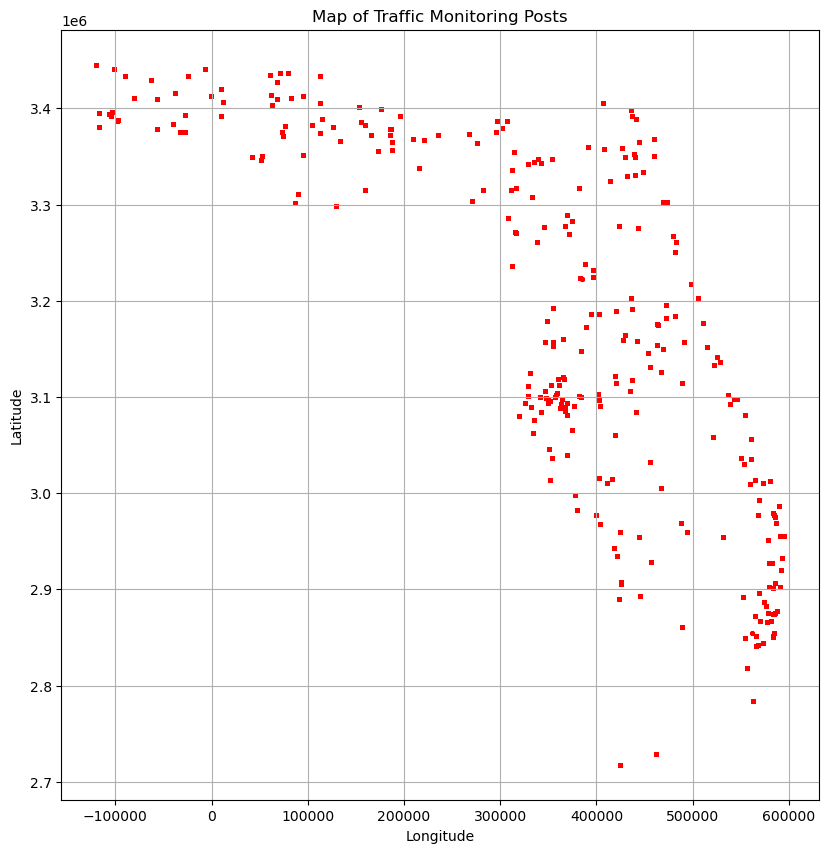

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
traffic_data_filtered.plot(ax=ax, color='red', markersize=5)
ax.set_title('Map of Traffic Monitoring Posts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)
plt.show()

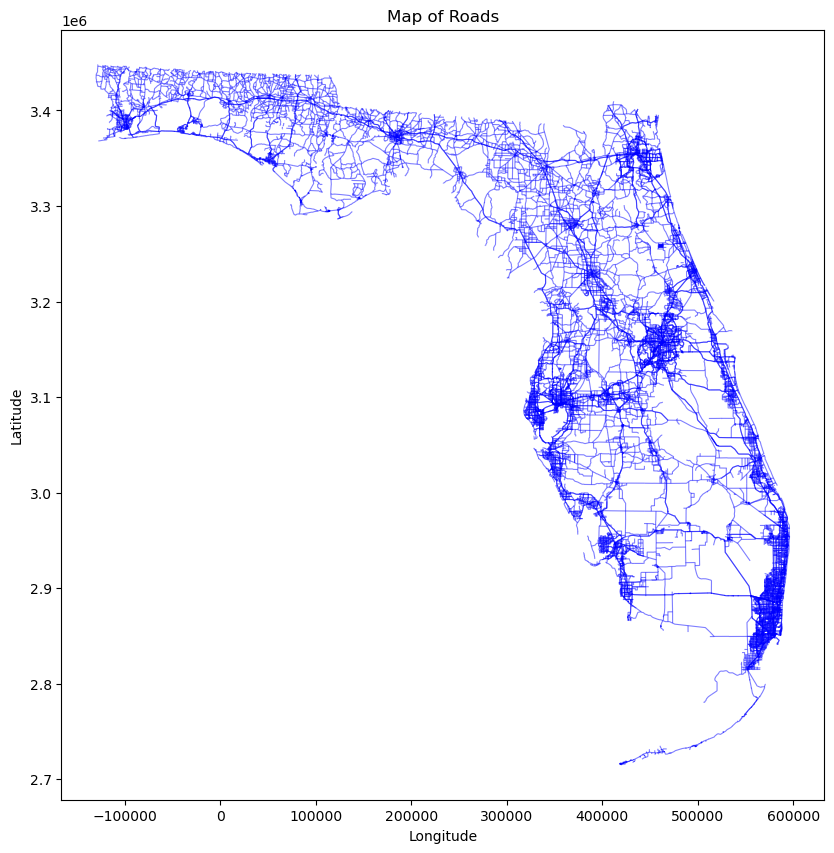

In [15]:
gdf_roads = gpd.GeoDataFrame(road_data)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_roads.plot(ax=ax, linewidth=0.8, color='blue', alpha=0.5)
ax.set_title('Map of Roads')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

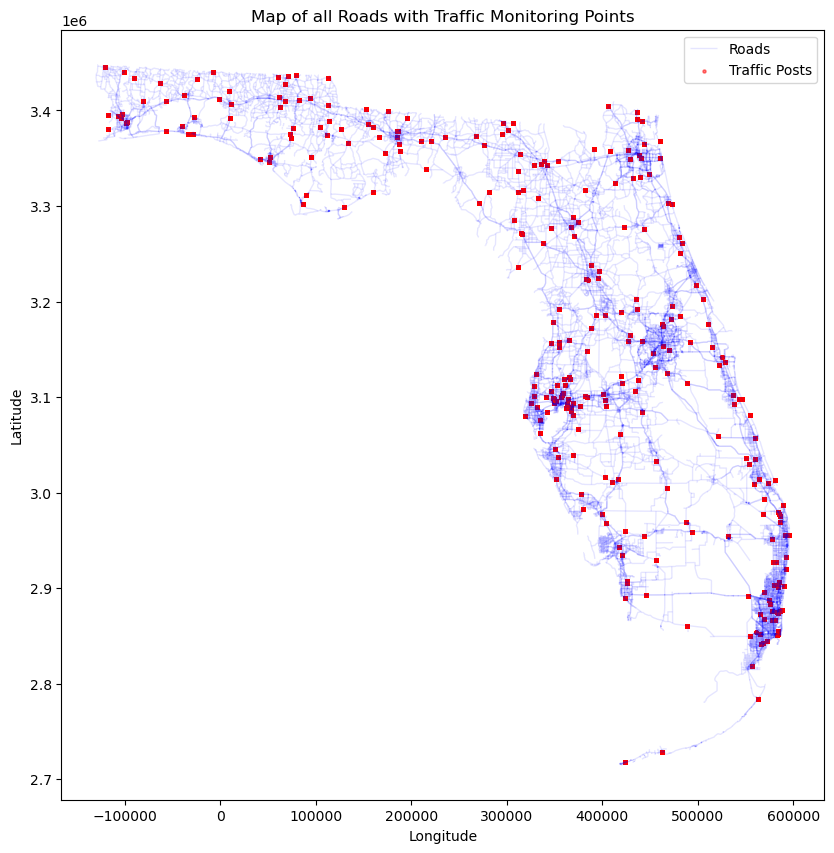

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf_roads.plot(ax=ax, linewidth=1, color='blue', label='Roads', alpha=0.1)
traffic_data_filtered.plot(ax=ax, color='red', markersize=5, alpha=0.5, label='Traffic Posts')

ax.set_title('Map of all Roads with Traffic Monitoring Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

In [17]:
common_roadways = set(traffic_data_filtered['ROADWAY']).intersection(set(gdf_roads['ROADWAY']))
intersection_roads = gdf_roads[gdf_roads['ROADWAY'].isin(common_roadways)]
intersection_traffic = traffic_data_filtered[traffic_data_filtered['ROADWAY'].isin(common_roadways)]

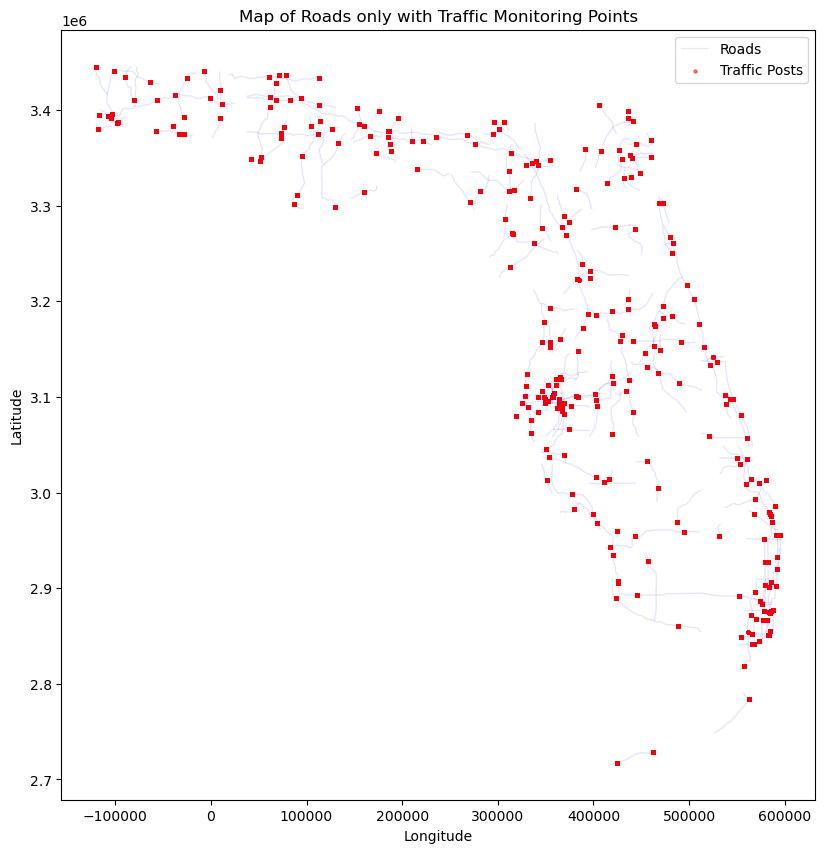

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

intersection_roads.plot(ax=ax, linewidth=1, color='blue', label='Roads', alpha=0.1)
traffic_data_filtered.plot(ax=ax, color='red', markersize=5, alpha=0.5, label='Traffic Posts')

ax.set_title('Map of Roads only with Traffic Monitoring Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

## Creating the Graph

In [19]:
def get_endpoints(geometry):
    if geometry.geom_type == 'LineString':
        coords = list(geometry.coords)
        return coords[0], coords[-1]
    elif geometry.geom_type == 'MultiLineString':
        first_part = list(geometry[0].coords)
        last_part = list(geometry[-1].coords)
        return first_part[0], last_part[-1]
    else:
        return None, None

road_data['endpoints'] = road_data['geometry'].apply(get_endpoints)

In [37]:
# Extract start and end points into separate lists
start_points = [point[0] for point in road_data['endpoints']]
end_points = [point[1] for point in road_data['endpoints']]

# Combine start and end points into a single list and create a DataFrame
all_points = start_points + end_points
all_points_df = pd.DataFrame(all_points, columns=['x', 'y'])

# Find unique points
unique_points_df = all_points_df.drop_duplicates()
unique_points_count = unique_points_df.shape[0]

# Identify intersection points (points that are both starts and ends)
start_points_set = set(start_points)
end_points_set = set(end_points)
intersection_points = start_points_set.intersection(end_points_set)
intersection_count = len(intersection_points)

# Print results
print(f"Total unique endpoints (start or end): {unique_points_count}")
print(f"Number of points that are both start and endpoints: {intersection_count}")

Total unique endpoints (start or end): 33417
Number of points that are both start and endpoints: 4833


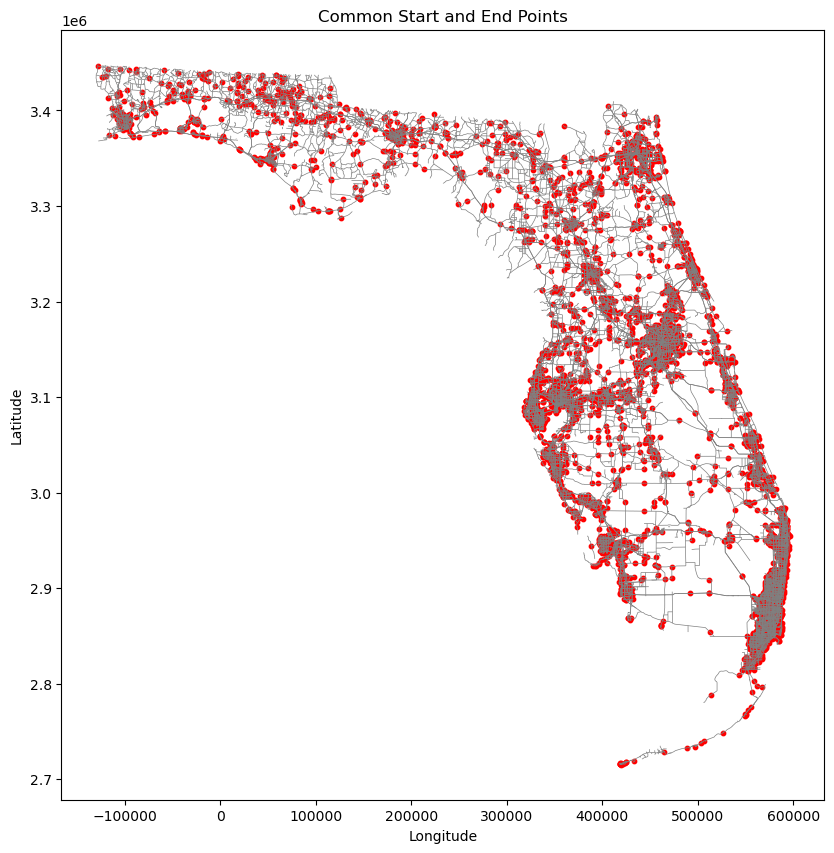

In [46]:
# Assuming road_data and the 'endpoints' column are already defined
start_points = [Point(point[0]) for point in road_data['endpoints'] if point is not None]
end_points = [Point(point[1]) for point in road_data['endpoints'] if point is not None]

# Combine start and end points into sets
start_points_set = set(start_points)
end_points_set = set(end_points)

# Identify intersection points
intersection_points = start_points_set.intersection(end_points_set)

# Create a list of Point geometries from intersection points
intersection_geom = [Point(xy) for xy in intersection_points]

# Convert intersection points to GeoDataFrame
intersection_gdf = gpd.GeoDataFrame(geometry=intersection_geom)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))
road_data.plot(ax=ax, color='gray', linewidth=0.5)  # Plot the roads
intersection_gdf.plot(ax=ax, color='red', markersize=10)  # Plot the common points

# Add titles and labels
ax.set_title('Common Start and End Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

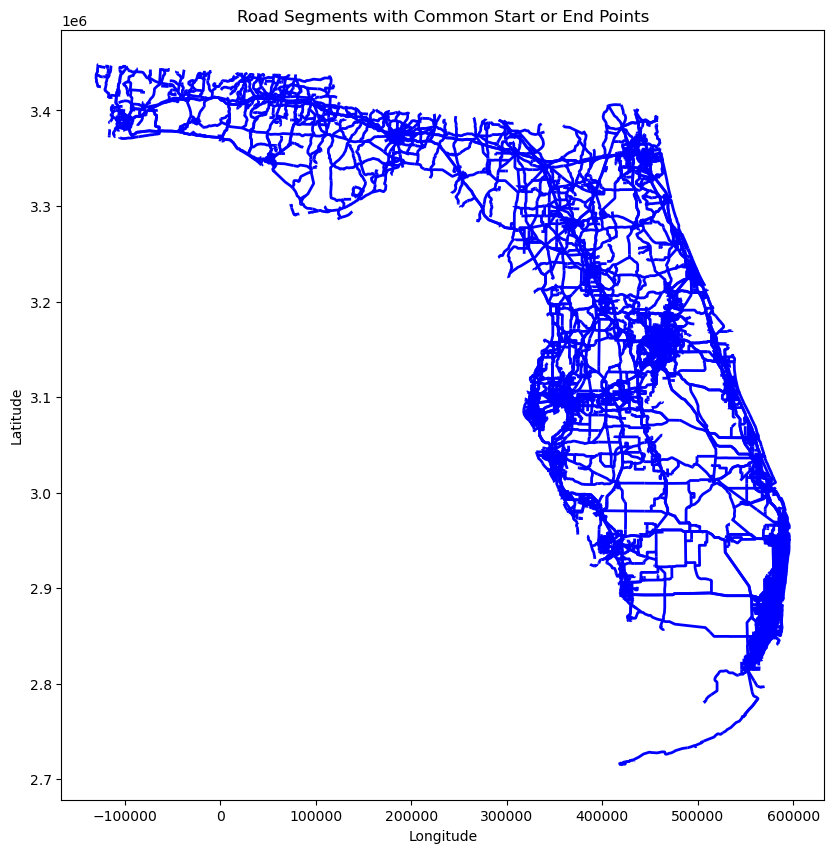

In [43]:
# Assuming road_data and the 'endpoints' column are already defined
start_points = [Point(point[0]) for point in road_data['endpoints'] if point is not None]
end_points = [Point(point[1]) for point in road_data['endpoints'] if point is not None]

# Identify intersection points
intersection_points = start_points_set.intersection(end_points_set)

# Filter road_data to include only those lines where the start or end point is in the intersection points
filtered_road_data = road_data[
    road_data['endpoints'].apply(lambda x: Point(x[0]) in intersection_points or Point(x[1]) in intersection_points)
]

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))
filtered_road_data.plot(ax=ax, color='blue', linewidth=2)  # Plot the filtered lines

# Add titles and labels
ax.set_title('Road Segments with Common Start or End Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

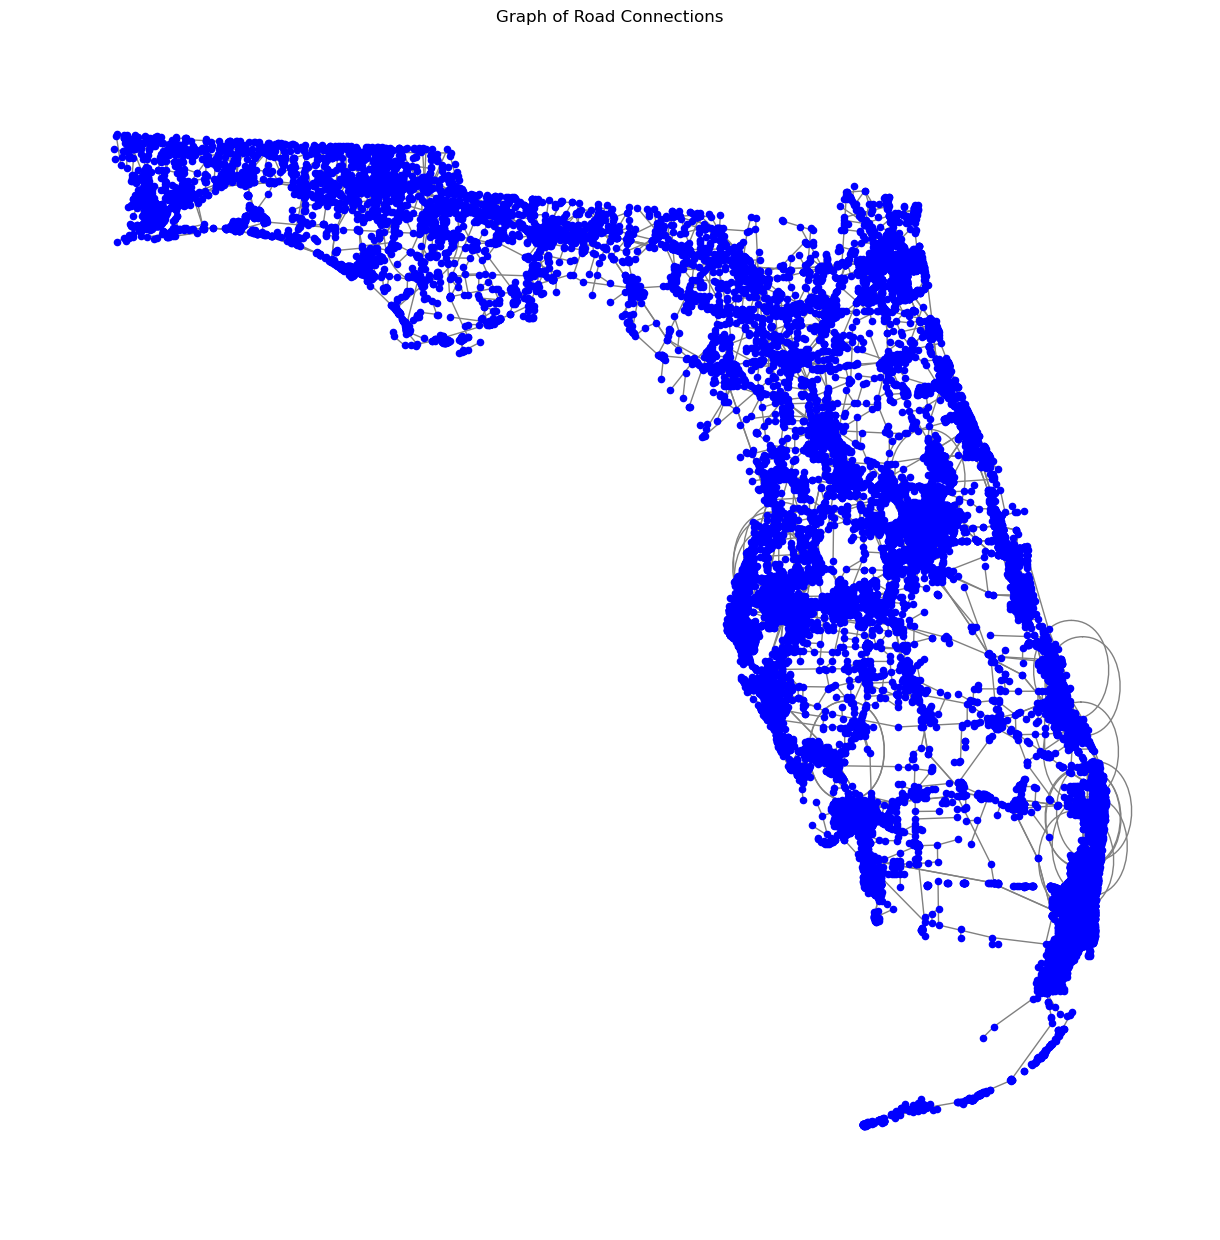

In [64]:
# Create a new graph
G = nx.Graph()

# Add points from both start and end points set as nodes
all_points_set = start_points_set.union(end_points_set)
for point in all_points_set:
    G.add_node(point)

# Add edges from the road_data
for index, row in road_data.iterrows():
    start_point = Point(row['endpoints'][0])
    end_point = Point(row['endpoints'][1])
    if start_point in all_points_set and end_point in all_points_set:
        G.add_edge(start_point, end_point, weight=row['HIGHMEASUR'], name=row['ROAD_ID'])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = {point: (point.x, point.y) for point in G.nodes()}  # Position nodes based on their coordinates
nx.draw(G, pos, node_size=20, node_color='blue', edge_color='gray')
plt.title('Graph of Road Connections')
plt.show()

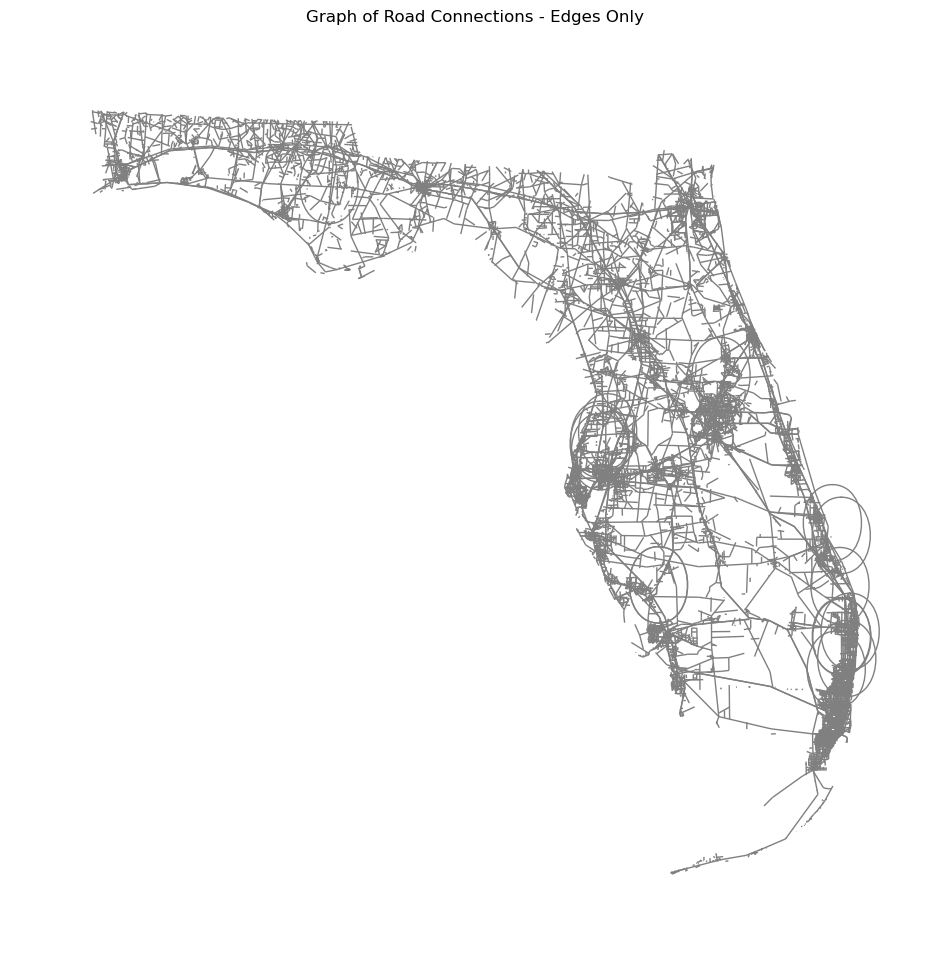

In [59]:
# Draw the graph
plt.figure(figsize=(12, 12))
pos = {point: (point.x, point.y) for point in G.nodes()}  # Position nodes based on their coordinates
nx.draw_networkx_edges(G, pos, edge_color='gray')  # Draw only edges
plt.title('Graph of Road Connections - Edges Only')
plt.axis('off')  # Turn off axis
plt.show()

Self-loops in the graph: [(<POINT (5.71e+05 3.02e+06)>, <POINT (5.71e+05 3.02e+06)>), (<POINT (3.58e+05 3.1e+06)>, <POINT (3.58e+05 3.1e+06)>), (<POINT (5.88e+05 2.91e+06)>, <POINT (5.88e+05 2.91e+06)>), (<POINT (3.52e+05 3.08e+06)>, <POINT (3.52e+05 3.08e+06)>), (<POINT (5.8e+05 2.91e+06)>, <POINT (5.8e+05 2.91e+06)>), (<POINT (5.74e+05 2.87e+06)>, <POINT (5.74e+05 2.87e+06)>), (<POINT (3.51e+05 3.1e+06)>, <POINT (3.51e+05 3.1e+06)>), (<POINT (5.84e+05 2.88e+06)>, <POINT (5.84e+05 2.88e+06)>), (<POINT (4.06e+05 2.96e+06)>, <POINT (4.06e+05 2.96e+06)>), (<POINT (3.51e+05 3.09e+06)>, <POINT (3.51e+05 3.09e+06)>), (<POINT (5.79e+05 2.91e+06)>, <POINT (5.79e+05 2.91e+06)>), (<POINT (4.66e+05 3.16e+06)>, <POINT (4.66e+05 3.16e+06)>), (<POINT (5.79e+05 3e+06)>, <POINT (5.79e+05 3e+06)>), (<POINT (9.53e+04 3.34e+06)>, <POINT (9.53e+04 3.34e+06)>), (<POINT (5.78e+05 2.95e+06)>, <POINT (5.78e+05 2.95e+06)>), (<POINT (4.06e+05 2.96e+06)>, <POINT (4.06e+05 2.96e+06)>)]

Parallel edges in the gra

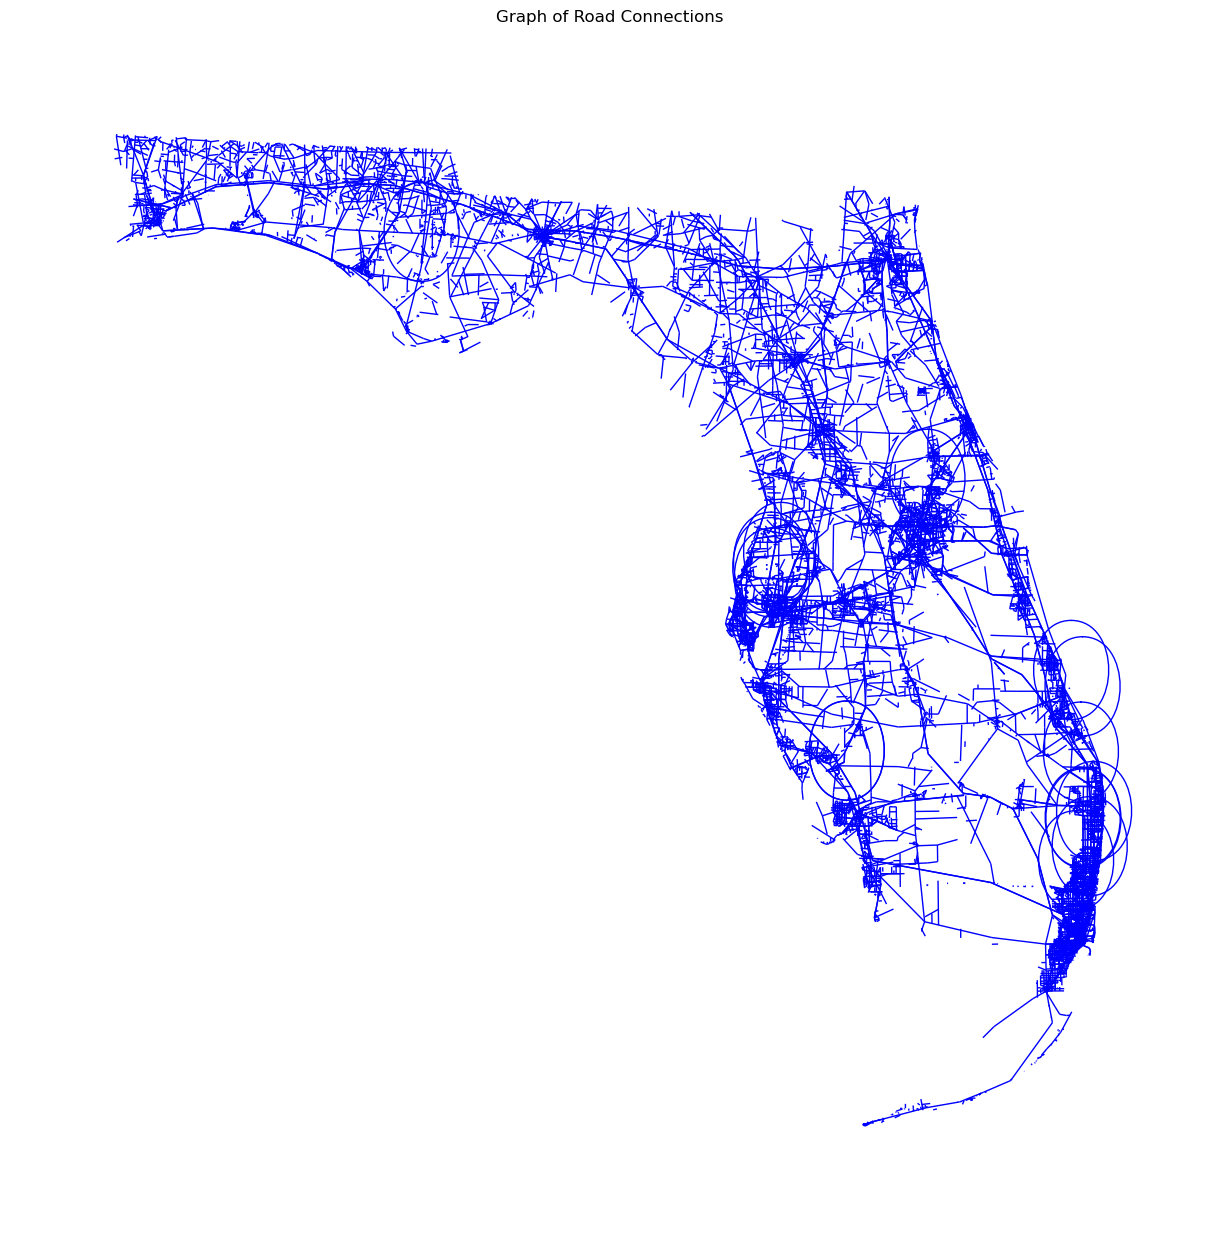

In [60]:
# Check for self-loops and number of parallel edges
self_loops = list(nx.selfloop_edges(G))
parallel_edges = [(u, v) for u, v, d in G.edges(data=True) if G.number_of_edges(u, v) > 1]

print("Self-loops in the graph:", self_loops)
print()
print("Parallel edges in the graph:", parallel_edges)

# Drawing the graph
plt.figure(figsize=(12, 12))
pos = {point: (point.x, point.y) for point in G.nodes()}  # Node positions based on geographic coordinates
nx.draw(G, pos, with_labels=False, node_size=0, edge_color='blue', node_color='blue')
plt.title('Graph of Road Connections')
plt.show()

In [61]:
# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

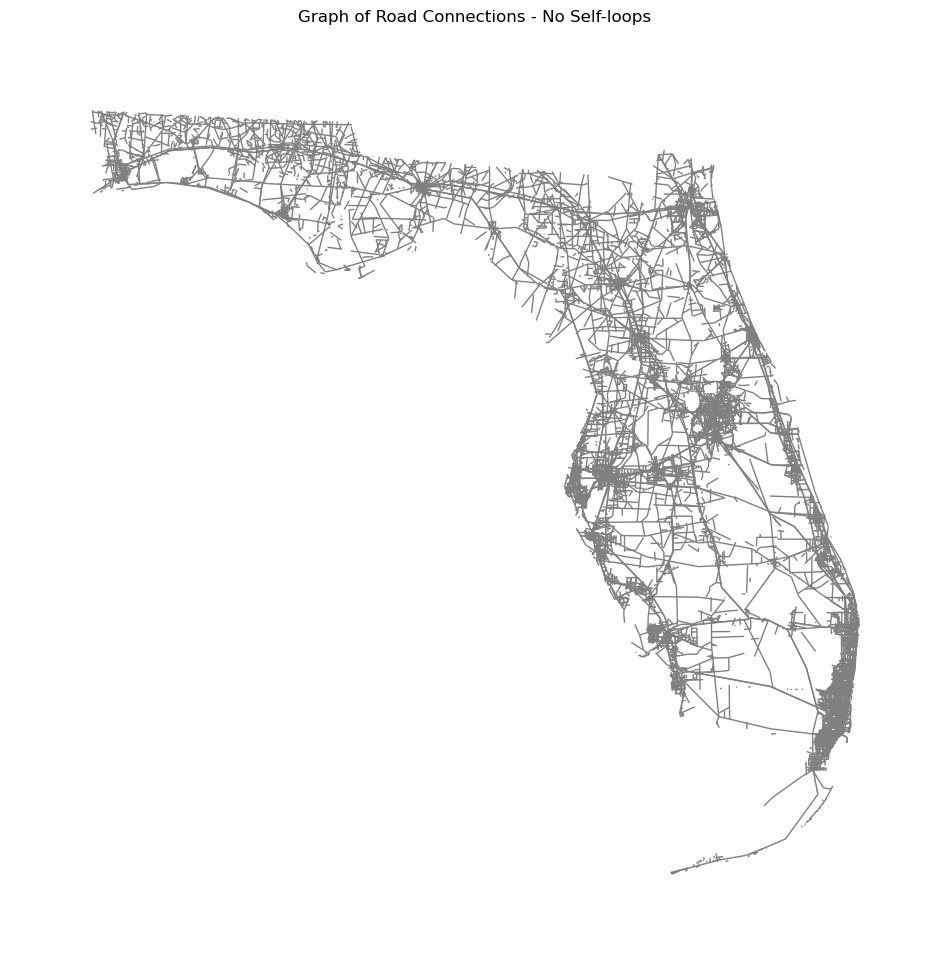

In [62]:
# Draw the graph
plt.figure(figsize=(12, 12))
pos = {point: (point.x, point.y) for point in G.nodes()}  # Position nodes based on their coordinates
nx.draw_networkx_edges(G, pos, edge_color='gray')  # Draw only edges
plt.title('Graph of Road Connections - No Self-loops')
plt.axis('off')  # Turn off axis
plt.show()

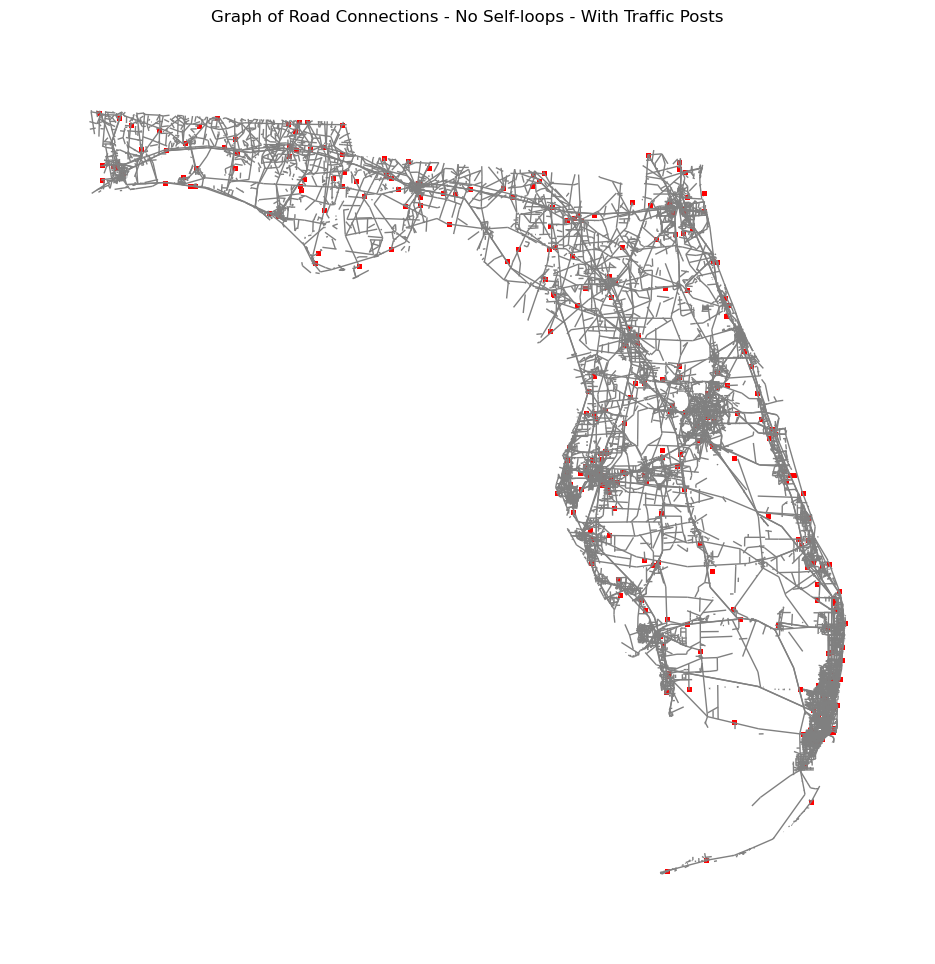

In [63]:
# Draw the graph
fig, ax = plt.subplots(figsize=(12, 12))
traffic_data_filtered.plot(ax=ax, color='red', markersize=5)
pos = {point: (point.x, point.y) for point in G.nodes()}  # Position nodes based on their coordinates
traffic_data_filtered.plot(ax=ax, color='red', markersize=5)
nx.draw_networkx_edges(G, pos, edge_color='gray')  # Draw only edges
plt.title('Graph of Road Connections - No Self-loops - With Traffic Posts')
plt.axis('off')  # Turn off axis
plt.show()